In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
import math
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor


In [34]:
pd.set_option('display.max_columns', None)

### Import Data

In [35]:
X_train = pd.read_csv('../data/train_tree.csv').set_index('Id').drop(1299)
X_test = pd.read_csv('../data/test_tree.csv').set_index('Id')
X_Ktest = pd.read_csv('../data/Ktest_tree.csv').set_index('Id')

In [36]:
y_train = pd.read_csv('../data/Model Train.csv').set_index('Id').drop(1299)['SalePrice']
y_test = pd.read_csv('../data/Model Test.csv')['SalePrice']
y_train = np.log(y_train)
y_test = np.log(y_test)
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

# Random Forest

In [12]:
randomForest = RandomForestRegressor()
grid_para_forest = [{
    "n_estimators": [1000],
    "min_samples_leaf": [1],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 15.5 s, sys: 238 ms, total: 15.7 s
Wall time: 53.9 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [15]:
print(grid_search_forest.best_params_)
rss = np.sum((y_train-grid_search_forest.predict(X_train))**2)
print('Training Error: ',math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_forest.predict(X_test))**2)
print('Test Error: ',math.sqrt(rss/X_test.shape[0]))

{'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 42}
Training Error:  0.051798090708543756
Test Error:  0.1495116021863833


In [17]:
rf = RandomForestRegressor(min_samples_leaf=1, n_estimators=1000, random_state=42)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [18]:
y_Ktest = rf.predict(X_Ktest)
rf_submission = pd.concat([X_Ktest.reset_index()['Id'],
                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)
rf_submission.to_csv('../submission/rf.csv',index=False)
# 0.14476 on Kaggle

# Ada Boost

In [37]:
from sklearn.ensemble import AdaBoostRegressor

In [38]:
ada = AdaBoostRegressor()

n_estimators = [60,70,80,90,100]
learning_rate = [0.3,0.4,0.5,0.6,0.7]

params = {'n_estimators':n_estimators,'learning_rate':learning_rate}
grid_search_ada= GridSearchCV( estimator=ada, param_grid=params )
%time grid_search_ada.fit(X_train,y_train)

CPU times: user 1min 17s, sys: 851 ms, total: 1min 18s
Wall time: 1min 20s


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [60, 70, 80, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
print(grid_search_ada.best_params_)
rss = np.sum((y_train-grid_search_ada.predict(X_train))**2)
print('Training Error: ',math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_ada.predict(X_test))**2)
print('Test Error: ',math.sqrt(rss/X_test.shape[0]))

{'learning_rate': 0.7, 'n_estimators': 60}
Training Error:  0.14727617463582776
Test Error:  0.18416732367467523


# Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
gb = GradientBoostingRegressor()

max_depth = [3,4,5]
n_estimators = [400,425,450,475,500]
learning_rate = [0.04,0.05,0.06,0.07,0.08]

params = {'max_depth':max_depth,'n_estimators':n_estimators,'learning_rate':learning_rate}
grid_search_gb= GridSearchCV( estimator=gb, param_grid=params )
%time grid_search_gb.fit(X_train,y_train)

CPU times: user 8min 49s, sys: 3.57 s, total: 8min 53s
Wall time: 9min 6s


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [40]:
print(grid_search_gb.best_params_)
rss = np.sum((y_train-grid_search_gb.predict(X_train))**2)
print('Training Error: ',math.sqrt(rss/X_train.shape[0]))
rss = np.sum((y_test-grid_search_gb.predict(X_test))**2)
print('Test Error: ',math.sqrt(rss/X_test.shape[0]))

{'learning_rate': 0.06, 'max_depth': 4, 'n_estimators': 450}
Training Error:  0.029760001476555283
Test Error:  0.13526668771484773


In [41]:
gb = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=275)
gb.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=275,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
y_Ktest = gb.predict(X_Ktest)
gb_submission = pd.concat([X_Ktest.reset_index()['Id'],
                            pd.DataFrame(math.e**(y_Ktest),columns=['SalePrice'])],axis=1)
gb_submission.to_csv('../submission/gb.csv',index=False)
# 0.13185 on Kaggle

In [43]:
impt_gb = permutation_importance(gb, X, y, n_repeats=10,
                                random_state=42)

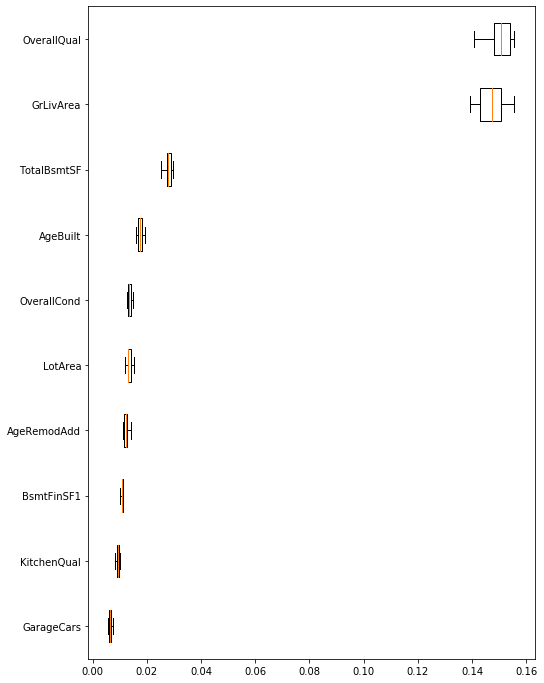

In [48]:
perm_sorted_idx = impt_gb.importances_mean.argsort()[-10:]
plt.figure(figsize=(8,12))
plt.boxplot(impt_gb.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
plt.savefig('../fig/gb_top10.png')